# ASSIGNMENT ON MODEL SELECTION

In [1]:
#Import the relevant Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Loading the Dataset 

In [2]:
data=pd.read_csv('titanic_dataset1.csv')

In [3]:
#Making ‘PassengerId’ as the index column
data=data.set_index('PassengerId')

### Checking the Basic details of Dataset

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
#Checkiing Number of Unique values in the dataset
duni= pd.DataFrame(data.nunique(),columns=['Unique Values'])
duni

,Unique Values
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


## Exploratory Data Analysis

In [11]:
#Calcualting the Surivival rates in the dataset and plotting it
survived = data[data['Survived'] == 1]
deceased = data[data['Survived'] == 0]
su=[len(survived)/len(data)*100.0,len(deceased)/len(data)*100.0]
print('Percentage of Survival and Deceased is',su)

Percentage of Survival and Deceased is [38.38383838383838, 61.61616161616161]


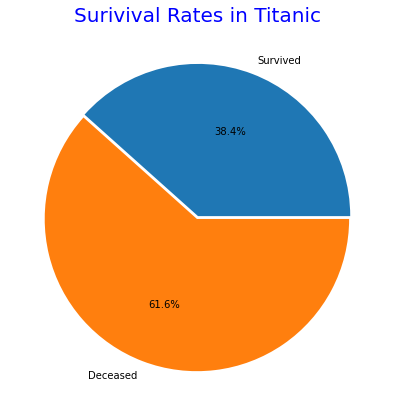

In [12]:
uni=['Survived','Deceased']
fig=plt.figure(figsize=(9,7))
plt.title('Surivival Rates in Titanic',size=20,color='blue')
plt.pie(su,labels=uni,autopct='%.1f%%',explode=[0.01]*2)
plt.show()

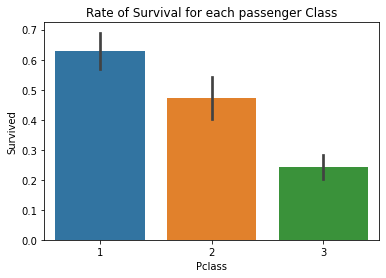

In [13]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Rate of Survival for each passenger Class')
plt.show()

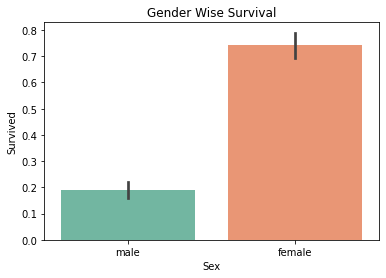

In [14]:
sns.barplot(x='Sex', y='Survived', data=data, palette='Set2')
plt.title('Gender Wise Survival')
plt.show()

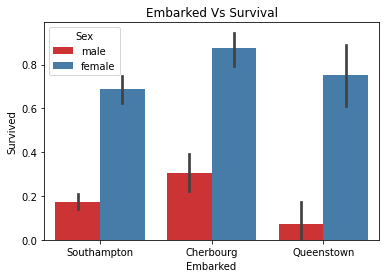

In [15]:
g=sns.barplot(x='Embarked', y='Survived',hue='Sex', data=data, palette='Set1')
labels = ['Southampton','Cherbourg','Queenstown']
g.set_xticklabels(labels)
plt.title('Embarked Vs Survival')
plt.show()

***

# 2.Pre-processing the Dataset

In [16]:
#Checking for duplicates in the dataset
data.duplicated().sum()

0

#### There are no duplicates in the dataset

In [17]:
#Checking for Null values in the dataset
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
#Finding Percentage of Null values
data.isna().sum()/data.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

#### There are null values in Age,cabin and Embarked Columns

### Filling the missing values present in all the columns in the dataset

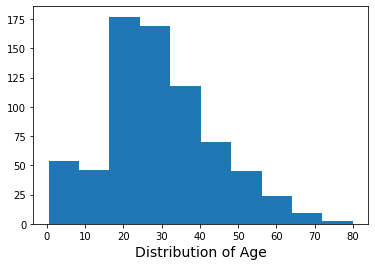

In [19]:
plt.hist(data['Age'])
plt.xlabel('Distribution of Age',size=14)
plt.show()

### 'Age' column is Right skewed So we use Median to fill the null values

In [20]:
data["Age"]=data["Age"].fillna(data['Age'].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 'Embarked' column is categorical one so we mode is used to fill in the values

In [21]:
data['Embarked']=data["Embarked"].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### 'Cabin' Column contains 687 null values (77% of data) so that column is dropped

In [22]:
data=data.drop('Cabin',axis=1)
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Now all null values are handled

In [23]:
data['Name'].nunique()

891

In [24]:
data['Ticket'].nunique()

681

### 'Name' column contains 891 and 'Ticket' column contains 681 unique values,it will not contribute much to model so the 2  columns are dropped

In [25]:
data=data.drop(['Name','Ticket'],axis=1)

In [26]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Checking for outliers  in the dataset

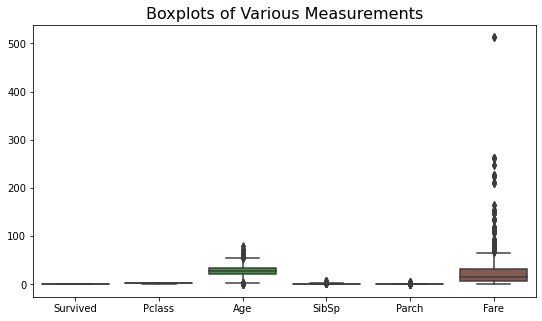

In [27]:
plt.figure(figsize=(9,5))
sns.boxplot(data=data)
plt.title('Boxplots of Various Measurements',fontsize=16)
plt.show()

#### Age and Fare column contains outliers but we want to find how Age and Ticket fare influenced the survival rate so those ouliers are not dropped

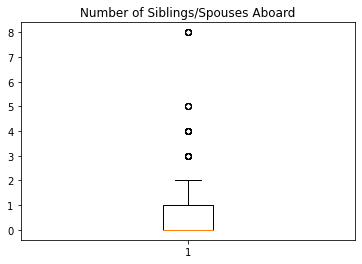

In [28]:
plt.boxplot(data['SibSp'])
plt.title('Number of Siblings/Spouses Aboard')
plt.show()

In [29]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

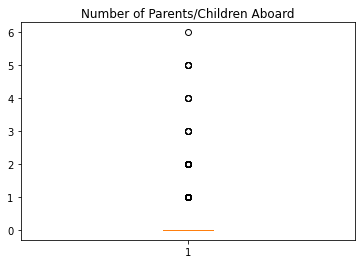

In [30]:
plt.boxplot(data['Parch'])
plt.title('Number of Parents/Children Aboard')
plt.show()

In [31]:
data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

#### The 'Sibsp' column and 'Parch' column contains few outliers. The unique values in this are not varying much. so these outliers should not be dropped

### Checking for Co-relation in the data

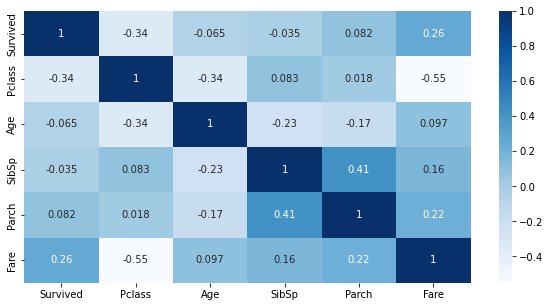

In [32]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmin=-0.55,vmax=1,cmap='Blues')
plt.show()

In [33]:
#Maximum co-relation is obtained as 0.41 nad minimum value is -0.55. So all columns are releavant in the dataset

### Feature Engineering on the dataset

In [34]:
#Siblings/Spouses column and Parents Children column are combined to form Family members column
data['Family_mem']=data['SibSp']+data['Parch']

In [35]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_mem
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0


### There are two categorical columns in the data. They are 'Sex' and 'Embarked'. They are to be Label Encoded

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_mem
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,2,1
2,1,1,0,38.0,71.2833,0,1
3,1,3,0,26.0,7.9250,2,0
4,1,1,0,35.0,53.1000,2,1
5,0,3,1,35.0,8.0500,2,0


***

# 3.MODEL CREATION

### Spliiting the Data into Features and target

In [37]:
#Survived Column is taken as Target and all other columns as features

In [38]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

### Standard scaling the Features 

In [39]:
#The Values in Fare and Age is Varying largely so standard scaling is to be done
from sklearn import preprocessing
std_scl=preprocessing.StandardScaler()
X1=std_scl.fit_transform(X)

In [40]:
X1=pd.DataFrame(X1,columns=X.columns)

In [41]:
X1.head()

,Pclass,Sex,Age,Fare,Embarked,Family_mem
0,0.827377,0.737695,-0.565736,-0.502445,0.585954,0.059160
1,-1.566107,-1.355574,0.663861,0.786845,-1.942303,0.059160
2,0.827377,-1.355574,-0.258337,-0.488854,0.585954,-0.560975
3,-1.566107,-1.355574,0.433312,0.420730,0.585954,0.059160
4,0.827377,0.737695,0.433312,-0.486337,0.585954,-0.560975


In [42]:
#Dividing the dataset into training and testing set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)

In [45]:
#Importing model checking Metrics
from sklearn.metrics import accuracy_score,confusion_matrix

## MODEL1- kNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k=[]
neighbors=range(1,17)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    model1=classifier.fit(X_train,Y_train)
    y_knn=model1.predict(X_test)
    acc=accuracy_score(Y_test,y_knn)
    metric_k.append(acc)

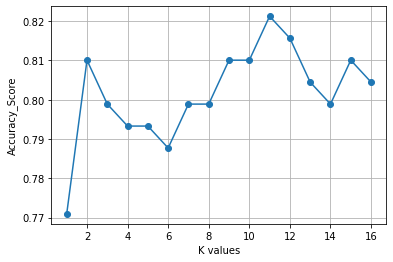

In [48]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K values')
plt.ylabel("Accuracy_Score")
plt.grid()

#### Maximum accuracy is obtained at k=11

In [49]:
kNN=KNeighborsClassifier(n_neighbors=11)
model1=kNN.fit(X_train,Y_train)
y_KNN_pred=model1.predict(X_test)
acc2=accuracy_score(Y_test,y_KNN_pred)
print('Accracy score of kNN Model at k=11 is:',acc2)

Accracy score of kNN Model at k=11 is: 0.8212290502793296


In [50]:
confusion_matrix(Y_test,y_KNN_pred)

array([[95, 10],
       [22, 52]], dtype=int64)

## Model 2-SVM-Linear Kernel

In [51]:
from sklearn.svm import SVC

In [52]:
clf_svm1=SVC(kernel="linear")
model2=clf_svm1.fit(X_train,Y_train)
y_svm1=model2.predict(X_test)

In [53]:
confusion_matrix(Y_test,y_svm1)

array([[88, 17],
       [22, 52]], dtype=int64)

In [54]:
acc3=accuracy_score(Y_test,y_svm1)
print('Accracy score of SVM-Linear Model is:',acc3)

Accracy score of SVM-Linear Model is: 0.7821229050279329


## Model 3- SVM-RBF Kernel

In [55]:
clf_svm2=SVC(kernel='rbf')
model3=clf_svm2.fit(X_train,Y_train)
y_svm2=model3.predict(X_test)

In [56]:
confusion_matrix(Y_test,y_svm2)

array([[93, 12],
       [21, 53]], dtype=int64)

In [57]:
acc4=accuracy_score(Y_test,y_svm2)
print('Accracy score of SVM-RBF Model is:',acc4)

Accracy score of SVM-RBF Model is: 0.8156424581005587


***

# 4.Cross Validation Techniques

## KFold Cross Validation

In [58]:
from sklearn.model_selection import KFold

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=42)

In [60]:
kfoldvalidator=KFold(10)

In [61]:
from sklearn.model_selection import cross_val_score

### Calculating Cross validation scores of kNN Model

In [62]:
cv_result=cross_val_score(model1,X1,Y,cv=kfoldvalidator)
cv_result

array([0.75555556, 0.83146067, 0.78651685, 0.79775281, 0.78651685,
       0.80898876, 0.79775281, 0.78651685, 0.84269663, 0.76404494])

In [63]:
cv1=np.mean(cv_result)
print('Average KFold Cross Validation score of kNN Model is:',cv1)

Average KFold Cross Validation score of kNN Model is: 0.7957802746566792


### Calculating Cross validation scores of SVM-Linear Model

In [64]:
cv_result2=cross_val_score(model2,X1,Y,cv=kfoldvalidator)
cv_result2

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [65]:
cv2=np.mean(cv_result2)
print('Average KFold Cross Validation score of SVM-Linear Model is:',cv2)

Average KFold Cross Validation score of SVM-Linear Model is: 0.786729088639201


### Calculating Cross validation scores of SVM-RBF Model

In [66]:
cv_result3=cross_val_score(model3,X1,Y,cv=kfoldvalidator)
cv_result3

array([0.81111111, 0.87640449, 0.80898876, 0.85393258, 0.82022472,
       0.79775281, 0.79775281, 0.7752809 , 0.91011236, 0.85393258])

In [67]:
cv3=np.mean(cv_result3)
print('Average KFold Cross Validation score of SVM-RBF Model is:',cv3)

Average KFold Cross Validation score of SVM-RBF Model is: 0.8305493133583021


## Stratified K-fold cross validation

In [68]:
from sklearn.model_selection import StratifiedKFold 

In [69]:
Stratifiedvalidator=StratifiedKFold(n_splits=10)

### Calculating Stratified K Fold Cross validation score of kNN Model

In [70]:
scv_result1=cross_val_score(model1,X1,Y,cv=Stratifiedvalidator)
scv_result1

array([0.76666667, 0.82022472, 0.75280899, 0.82022472, 0.80898876,
       0.79775281, 0.82022472, 0.79775281, 0.82022472, 0.7752809 ])

In [71]:
scv1=np.mean(scv_result1)
print("Average Stratified K Fold Cross validation score of kNN Model is:",scv1)

Average Stratified K Fold Cross validation score of kNN Model is: 0.7980149812734082


### Calculating Stratified K Fold Cross validation score of SVM-Linear Model

In [72]:
scv_result2=cross_val_score(model2,X1,Y,cv=Stratifiedvalidator)
scv_result2

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [73]:
scv2=np.mean(scv_result2)
print("Average Stratified K Fold Cross validation score of SVM-LInear Model is:",scv2)

Average Stratified K Fold Cross validation score of SVM-LInear Model is: 0.786729088639201


### Calculating Stratified K Fold Cross validation score of SVM-RBF Model

In [74]:
scv_result3=cross_val_score(model3,X1,Y,cv=Stratifiedvalidator)
scv_result3

array([0.81111111, 0.80898876, 0.76404494, 0.87640449, 0.84269663,
       0.78651685, 0.82022472, 0.78651685, 0.88764045, 0.83146067])

In [75]:
scv3=np.mean(scv_result3)
print("Average Stratified K Fold Cross validation score of SVM-RBF Model is:",scv3)

Average Stratified K Fold Cross validation score of SVM-RBF Model is: 0.8215605493133584


***

## Creating a Dataframe with all the Accuracy score for comparison

In [76]:
score={'Model Name':['kNN','SVM-Linear','SVM-RBF',],'Accuracy score':[acc2,acc3,acc4],'KFold CV Score':[cv1,cv2,cv3],'Stratified-KFold CV Score':[scv1,scv2,scv3]}
df=pd.DataFrame(score)
df=df.set_index('Model Name')
df

,Accuracy score,KFold CV Score,Stratified-KFold CV Score
Model Name,,,
kNN,0.821229,0.795780,0.798015
SVM-Linear,0.782123,0.786729,0.786729
SVM-RBF,0.815642,0.830549,0.821561


### Maximum accuracy score is obtained for kNN Model at k=11 as 0.821. On cross validation the Average CV scores of kNN Model is reduced.In SVM-linear model scores are almost same after cross validation. The CV scores of SVM-RBF model is increased to 0.83  and 0.82 after Cross validation.SVM-RBF model works slightly better after cross validation

***
***